In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("New Data.csv")

In [ ]:
# Extract the emissions data
emissions = data['Emisi'].values

In [ ]:
data.head()

,Minggu,Emisi
0,ke-1,49840
1,ke-2,46672
2,ke-3,41533
3,ke-4,41161
4,ke-5,41661


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Minggu  1000 non-null   object
 1   Emisi   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
data.describe()

,Emisi
count,1000.000000
mean,27000.540000
std,11414.490114
min,7935.000000
25%,16553.750000
50%,24953.500000
75%,38307.000000
max,49840.000000


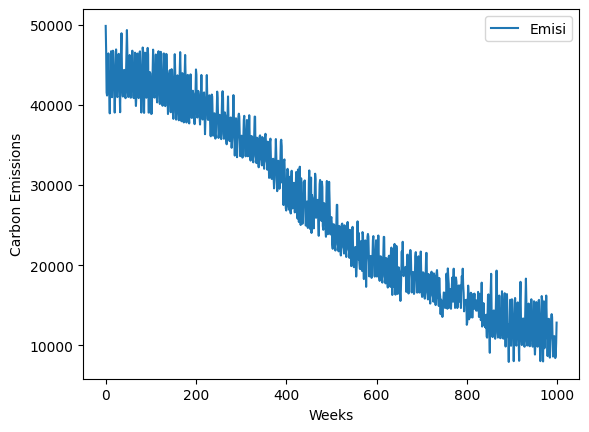

In [ ]:
# Plot the data
x=data['Minggu']
y=data['Emisi']
plt.plot(y, label='Emisi')
plt.xlabel('Weeks')
plt.ylabel('Carbon Emissions')
plt.legend()
plt.show()

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
emissions = scaler.fit_transform(emissions.reshape(-1, 1))

In [ ]:
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        target.append(data[i+seq_length])
    return np.array(sequences), np.array(target)

In [ ]:
seq_length = 4
sequences, target = create_sequences(emissions, seq_length)
X_train, X_test, y_train, y_test = train_test_split(sequences, target, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

796
200
796
200


In [ ]:
# Define the LSTM model
model = keras.Sequential()
model.add(keras.layers.LSTM(256, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model.add(keras.layers.LSTM(128, activation='relu', return_sequences=True))
model.add(keras.layers.LSTM(64, activation='relu', return_sequences=False))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 4, 256)              │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 4, 128)              │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 510,785 (1.95 MB)

 Trainable params: 510,785 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.2333 - val_loss: 0.0246
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0260 - val_loss: 0.0114
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0129 - val_loss: 0.0058
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0103 - val_loss: 0.0051
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0101 - val_loss: 0.0048
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0100 - val_loss: 0.0046
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0093 - val_loss: 0.0054
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0097 - val_loss: 0.0043
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0069 - val_loss: 0.0042
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0083 - val_loss: 0.0044
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0098 - val_loss: 0.0044
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0

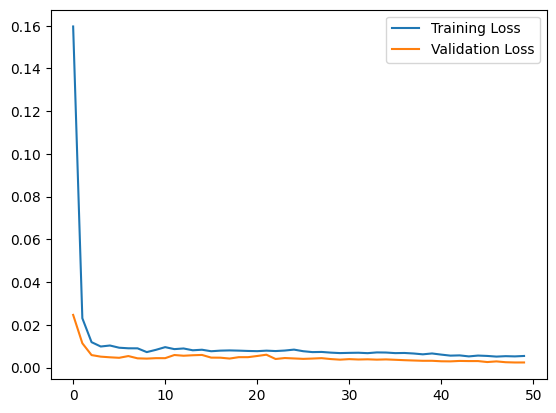

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Predict emissions for the test data
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.03929910520215799
Mean Squared Error (MSE): 0.002385622069120297
Root Mean Squared Error (RMSE): 0.048842830273442356


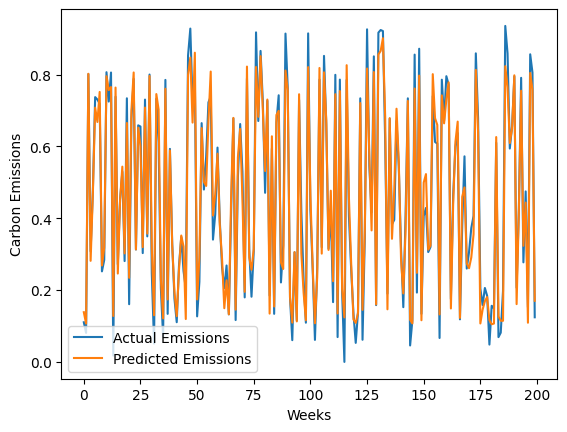

In [ ]:
plt.plot(y_test, label='Actual Emissions')
plt.plot(y_pred, label='Predicted Emissions')
plt.xlabel('Weeks')
plt.ylabel('Carbon Emissions')
plt.legend()
plt.show()

In [ ]:
act = []
pred = []

i=10
Xt = model.predict(X_test[i].reshape(1,4,1))
print('predicted:{0}, actual:{1}'.format(scaler.inverse_transform(Xt),scaler.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scaler.inverse_transform(Xt))
act.append(scaler.inverse_transform(y_test[i].reshape(-1,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
predicted:[[41275.617]], actual:[[41747.]]


In [ ]:
def predict(model, week):
  scaler=MinMaxScaler()
  weeks = np.array(week)
  weeks = scaler.fit_transform(weeks.reshape(-1,1))
  totalweeks = weeks.reshape(1,4,1)

  pred = model.predict(totalweeks)

  prediksi = scaler.inverse_transform(pred).flatten()

  print("Prediksi emisi karbon anda pada minggu selanjutnya sebesar: ", prediksi)

  return prediksi

In [ ]:
week = [[45879, 41236, 41562, 43947]]
predict(model, week)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediksi emisi karbon anda pada minggu selanjutnya sebesar:  [42607.1]


array([42607.1], dtype=float32)

In [ ]:
tf.keras.models.save_model(model, 'prediksi_emisi_mingguan.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('./prediksi_emisi_mingguan.h5')

In [ ]:
week = [84743, 93845, 87362, 85236]
predict(loaded_model, week)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
Prediksi emisi karbon anda pada minggu selanjutnya sebesar:  [86645.96]


array([86645.96], dtype=float32)